Definition of the function and minimization:

In [26]:
import numpy as np
from iminuit import Minuit

def model(a,b,x):
    y = a*x + b
    return y

Ndata_list = np.random.rand(100)
#some variable, like position
x = np.linspace(0,100,100)

#chi-square
def chi_square_f(a,b):
    chi_list = []
    for i in range(len(Ndata_list)):
        Nmodel = model(a,b,x[i])
        Ndata = Ndata_list[i]
        chi = (Ndata - Nmodel)**2/Nmodel
        chi_list.append(chi)
    chi_total = sum(chi_list)
    return chi_total

#defining minimization function
min_chi = Minuit(chi_square_f, a=0.5, b=0.5)
#defining limits of parameters
min_chi.limits['a'] = (0,50)
min_chi.limits['b'] = (0,50)
#defining if profiles or contours are bounded by least squares or max likelihood
min_chi.errordef = Minuit.LEAST_SQUARES
#minimize the function
min_chi.migrad()
print(min_chi)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 15.77                      │              Nfcn = 121              │
│ EDM = 7.6e-06 (Goal: 0.0002)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │       SOME Parameters at limit       │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬──────

Profile plot:

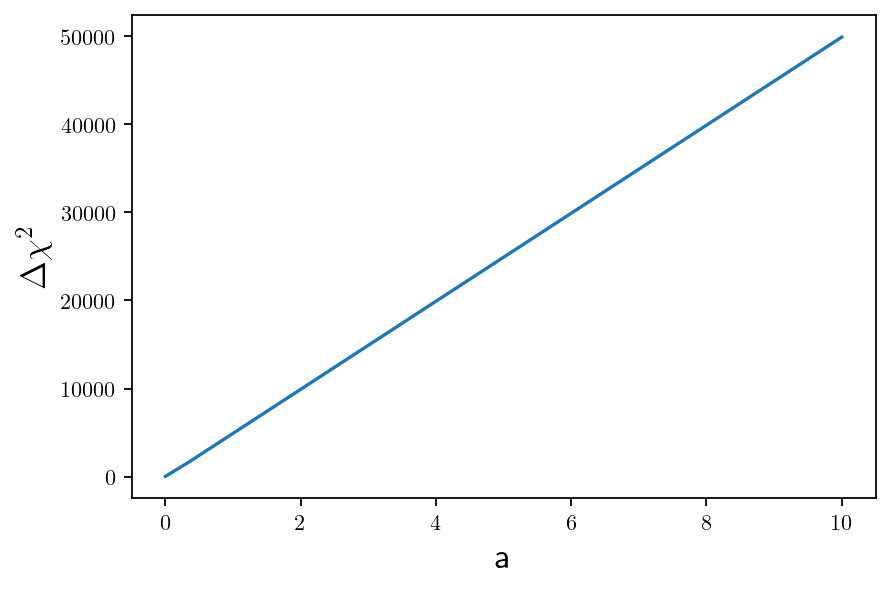

In [27]:
a,chi,ok = min_chi.mnprofile('a', bound=(0,10))

import matplotlib.pyplot as plt
plt.style.use('style.mplstyle')
plt.figure(dpi=160)
plt.plot(a,chi,'-')
plt.xlabel(r'a',fontsize=16)
plt.ylabel(r'$\Delta \chi^2$',fontsize=16)
plt.show()

Contour plot of a and b:

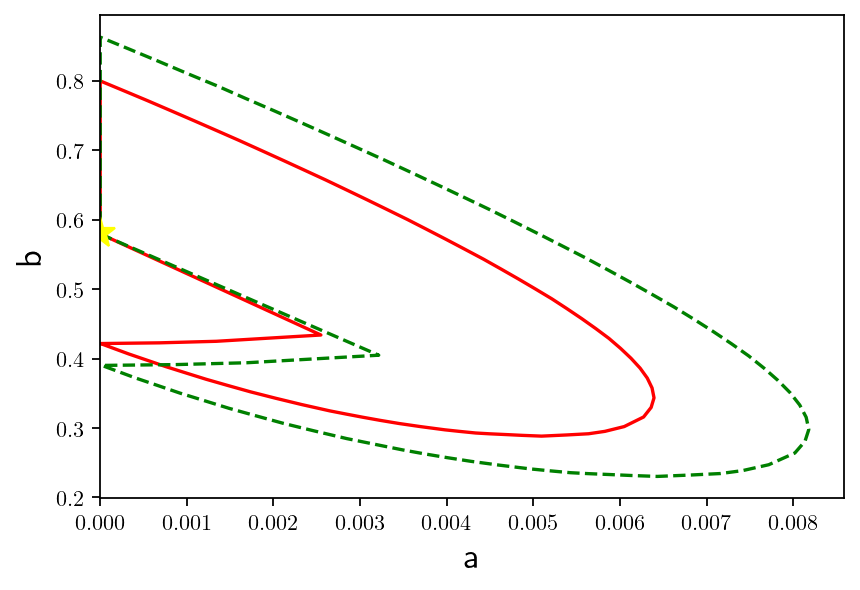

In [30]:
x1 = min_chi.mncontour('a','b', cl=0.95)
x2 = min_chi.mncontour('a','b', cl=0.99)
a1 = x1[:,0]
a2 = x2[:,0]
b1 = x1[:,1]
b2 = x2[:,1]

import matplotlib.pyplot as plt
plt.style.use('style.mplstyle')
plt.figure(dpi=160)
plt.plot(a1,b1,'r-', label=r'95%C.L.')
plt.plot(a2,b2,'g--', label=r'99%C.L.')
plt.plot(min_chi.values['a'], min_chi.values['b'], '*', markersize=14, color='yellow')
plt.xlabel(r'a',fontsize=16)
plt.ylabel(r'b',fontsize=16)
plt.xlim(0,)
plt.show()